In [1]:
cmd_personal_test = 1
cmd_image_index = 0

In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

token = 'Flicker8k_text/Flickr8k.token.txt'

captions = open(token, 'r').read().strip().split('\n')

imag_dict = {}
for row in captions:
    row = row.split('\t')
    row[0] = row[0][:len(row[0]) - 2]
    if row[0] in imag_dict:
        imag_dict[row[0]].append(row[1])
    else:
        imag_dict[row[0]] = [row[1]]
#print(imag_dict)

In [7]:
import glob
if cmd_personal_test == 1:
    imag = 'Flicker8k_Dataset/PersonaltestImages/'
    images = glob.glob(imag+'*.jpg')
else: 
    imag = 'Flicker8k_Dataset/Flicker8k_Dataset/'
    images = glob.glob(imag+'*.jpg')
    f = open('Flicker8k_text/PersonaltestImages.txt', 'w')
    for i in len(images):
        f.write(i[len(imag):])
    f.close()

In [8]:
for i in range(len(images)):
    if images[i].find('') >= 0:
        images[i] = images[i][:len(imag)-1] + '/' + images[i][len(imag):]

train_images_file = 'Flicker8k_text/Flickr_8k.trainImages.txt'

train_images_set = set(open(train_images_file, 'r').read().strip().split('\n'))

def split_data(l):
    temp = []
    for i in images:
        if i[len(imag):] in l:
            temp.append(i)
    return temp

train_images = split_data(train_images_set)

val_images_file = 'Flicker8k_text/Flickr_8k.devImages.txt'
val_images_set = set(open(val_images_file, 'r').read().strip().split('\n'))
val_images = split_data(val_images_set)

from PIL import Image

# Image.open(train_images[0])

def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

from keras.preprocessing import image
import numpy as np

def preprocess(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    x = preprocess_input(x)
    return x

import matplotlib.pyplot as plt

# plt.imshow(np.squeeze(preprocess(train_images[0])))

from keras.applications.inception_v3 import InceptionV3
model = InceptionV3(weights='imagenet')


from keras.models import Model

new_input = model.input
hidden_layer = model.layers[-2].output

model_new = Model(new_input, hidden_layer)

# tryi = model_new.predict(preprocess(train_images[0]))

def encode(image):
    image = preprocess(image)
    temp_enc = model_new.predict(image)
    temp_enc = np.reshape(temp_enc, temp_enc.shape[1])
    return temp_enc
print("good")

Using TensorFlow backend.


good


In [9]:
from tqdm import tqdm
import tensorflow as tf   
encoding_train = {}
# for oneimage in tqdm(train_images):
#     encoding_train[oneimage[len(imag):]] = encode(oneimage)

In [10]:
import pickle
# with open("encoded_images_inceptionV3.p", "wb") as encoded_pickle:
#     pickle.dump(encoding_train, encoded_pickle)

#test_images_file = 'Flicker8k_text/Flickr_8k.testImages.txt

In [11]:
if cmd_personal_test == 1:
    test_images_file = 'Flicker8k_text/PersonaltestImages.txt'
else:
    test_images_file = 'Flicker8k_text/Flickr_8k.testImages.txt'
test_images_set = set(open(test_images_file, 'r').read().strip().split('\n'))
print(test_images_set)

{'bike-rider-1-2col.jpg', '2677656448_6b7e7702af.jpg'}


In [12]:
test_images = split_data(test_images_set)
#test_images = split_data(test_images_set)
#print(test_images)

In [13]:
encoding_test = {}
from tqdm import tqdm    

if cmd_personal_test == 1:
    for oneimage in tqdm(test_images):
        encoding_test[oneimage[len(imag):]] = encode(oneimage)  
    with open("encoded_images_personaltest_inceptionV3.p", "wb") as encoded_pickle:
        pickle.dump(encoding_test, encoded_pickle)
    encoding_test = pickle.load(open('encoded_images_personaltest_inceptionV3.p', 'rb'))
else:
    encoding_test = pickle.load(open('encoded_images_test_inceptionV3.p', 'rb'))

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.08s/it]


In [14]:
import pickle
encoding_train = pickle.load(open('encoded_images_inceptionV3.p', 'rb'))

# train_dict = {}
# for i in train_images:
#     if i[len(imag):] in imag_dict:
#         train_dict[i] = imag_dict[i[len(imag):]]
# print(train_dict)

In [15]:
# train_dict_file = open('train_dict_file.pkl', 'wb')
# pickle.dump(train_dict, train_dict_file)
# train_dict_file.close()

In [16]:
train_dict_file = open('train_dict_file.pkl', 'rb')
train_dict = pickle.load(train_dict_file)
train_dict_file.close()

In [17]:
# val_dict = {}
# for i in val_images:
#     if i[len(imag):] in imag_dict:
#         val_dict[i] = imag_dict[i[len(imag):]]
        
# val_dict_file = open('val_dict_file.pkl', 'wb')
# pickle.dump(val_dict, val_dict_file)
# val_dict_file.close()

# val_dict_file = open('val_dict_file.pkl', 'rb')
# val_dict = pickle.load(val_dict_file)
# val_dict_file.close()

In [18]:
# test_dict = {}
# for i in test_images:
#     if i[len(imag):] in imag_dict:
#         test_dict[i] = imag_dict[i[len(imag):]]
        
# test_dict_file = open('test_dict_file.pkl', 'wb')
# pickle.dump(test_dict, test_dict_file)
# test_dict_file.close()

# test_dict_file = open('test_dict_file.pkl', 'rb')
# test_dict = pickle.load(test_dict_file)
# test_dict_file.close()

In [19]:
caps = []
for key, val in train_dict.items():
    for i in val:
        caps.append('<start> ' + i + ' <end>')

In [20]:
words = [i.split() for i in caps]

In [21]:
# unique = []
# for i in words:
#     unique.extend(i)

# unique = list(set(unique))
# with open("unique.p", "wb") as pickle_d:
#     pickle.dump(unique, pickle_d)

    
unique = pickle.load(open('unique.p', 'rb'))

word2idx = {val:index for index, val in enumerate(unique)}
idx2word = {index:val for index, val in enumerate(unique)}

print(word2idx['<start>'])
print(idx2word[5553])

max_len = 0
for c in caps:
    c = c.split()
    if len(c) > max_len:
        max_len = len(c)

vocab_size = len(unique)
print(len(unique), max_len)

5553
<start>
8256 40


In [22]:
# f = open('flickr8k_training_dataset.txt', 'w')
# f.write("image_id\tcaptions\n")


# for key, val in train_dict.items():
#     for i in val:
#         f.write(key[len(imag):] + "\t" + "<start> " + i +" <end>" + "\n")

# f.close()
import pandas as pd
df = pd.read_csv('flickr8k_training_dataset.txt', delimiter='\t')
len(df)

30000

In [23]:
c = [i for i in df['captions']]
len(c)

30000

In [252]:
imgs = [i for i in df['image_id']]

In [253]:
a = c[0]
a, imgs[0]

('<start> A brown and black dog runs down a sandy beach . <end>',
 '1799271536_6e69c8f1dc.jpg')

In [254]:
for i in a.split():
    print (i, "=>", word2idx[i])

<start> => 5553
A => 4228
brown => 8177
and => 492
black => 2143
dog => 173
runs => 5544
down => 2383
a => 32
sandy => 4776
beach => 7057
. => 7023
<end> => 5232


In [255]:
samples_per_epoch = 0
for ca in caps:
    samples_per_epoch += len(ca.split())-1
    

samples_per_epoch

383454

In [256]:
from keras.preprocessing import sequence
def data_generator(batch_size = 32):
        partial_caps = []
        next_words = []
        images = []
        
        df = pd.read_csv('flickr8k_training_dataset.txt', delimiter='\t')
        df = df.sample(frac=1)
        iter = df.iterrows()
        c = []
        imgs = []
        for i in range(df.shape[0]):
            x = next(iter)
            c.append(x[1][1])
            imgs.append(x[1][0])


        count = 0
        while True:
            for j, text in enumerate(c):
                current_image = encoding_train[imgs[j]]
                for i in range(len(text.split())-1):
                    count+=1
                    
                    partial = [word2idx[txt] for txt in text.split()[:i+1]]
                    partial_caps.append(partial)
                    
                    # Initializing with zeros to create a one-hot encoding matrix
                    # This is what we have to predict
                    # Hence initializing it with vocab_size length
                    n = np.zeros(vocab_size)
                    # Setting the next word to 1 in the one-hot encoded matrix
                    n[word2idx[text.split()[i+1]]] = 1
                    next_words.append(n)
                    
                    images.append(current_image)

                    if count>=batch_size:
                        next_words = np.asarray(next_words)
                        images = np.asarray(images)
                        partial_caps = sequence.pad_sequences(partial_caps, maxlen=max_len, padding='post')
                        yield [[images, partial_caps], next_words]
                        partial_caps = []
                        next_words = []
                        images = []
                        count = 0

In [257]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Input, TimeDistributed, Dense, RepeatVector,merge, Merge, Activation, Flatten,concatenate 
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.preprocessing import image
from keras.preprocessing import sequence

embedding_size = 256

In [258]:

image_model = Sequential([
        Dense(embedding_size, input_shape=(2048,), activation='relu'),
        RepeatVector(max_len)
    ])

image_model.summary()
image_model.input_shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               524544    
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 40, 256)           0         
Total params: 524,544
Trainable params: 524,544
Non-trainable params: 0
_________________________________________________________________


(None, 2048)

In [259]:
caption_model = Sequential([
        Embedding(vocab_size, embedding_size, input_length=max_len),
        LSTM(256, return_sequences=True),
        TimeDistributed(Dense(256))
    ])

caption_model.summary()
caption_model.input_shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 40, 256)           2113536   
_________________________________________________________________
lstm_13 (LSTM)               (None, 40, 256)           525312    
_________________________________________________________________
time_distributed_7 (TimeDist (None, 40, 256)           65792     
Total params: 2,704,640
Trainable params: 2,704,640
Non-trainable params: 0
_________________________________________________________________


(None, 40)

In [260]:
model_output = concatenate([image_model.output,caption_model.output], axis = 2)

In [261]:
Out = Bidirectional(LSTM(256, return_sequences=False))(model_output)
Out = Dense(vocab_size)(Out)
Out = Activation('softmax')(Out)

In [262]:
with tf.device('/device:GPU:0'):
# final_model = Sequential([
#             Merge([image_model, caption_model], mode='concat', concat_axis=1),
#             Bidirectional(LSTM(256, return_sequences=False)),
#             Dense(vocab_size),
#             Activation('softmax')
#         ])
    final_model = Model([image_model.input, caption_model.input], Out)

In [263]:
final_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
final_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_7_input (InputLayer)  (None, 40)           0                                            
__________________________________________________________________________________________________
dense_19_input (InputLayer)     (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 40, 256)      2113536     embedding_7_input[0][0]          
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 256)          524544      dense_19_input[0][0]             
__________________________________________________________________________________________________
lstm_13 (L

In [264]:
# with tf.device('/device:GPU:0'):
#     final_model.fit_generator(data_generator(batch_size=256), steps_per_epoch=samples_per_epoch, nb_epoch=1, 
#                                   verbose=1)

In [265]:
#final_model.save_weights('time_inceptionV3_12_11_13.h5')


In [266]:
final_model.load_weights('time_inceptionV3_12_11_13.h5')

In [267]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word2idx[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        e = encoding_test[image[len(imag):]]
        preds = final_model.predict([np.array([e]), np.array(par_caps)])
        word_pred = idx2word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

In [268]:
def beam_search_predictions(image, beam_index = 3):
    start = [word2idx["<start>"]]
    
    start_word = [[start, 0.0]]
    
    while len(start_word[0][0]) < max_len:
        temp = []
        for s in start_word:
            par_caps = sequence.pad_sequences([s[0]], maxlen=max_len, padding='post')
            e = encoding_test[image[len(imag):]]
            preds = final_model.predict([np.array([e]), np.array(par_caps)])
            
            word_preds = np.argsort(preds[0])[-beam_index:]
            
            # Getting the top <beam_index>(n) predictions and creating a 
            # new list so as to put them via the model again
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])
                    
        start_word = temp
        # Sorting according to the probabilities
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        # Getting the top words
        start_word = start_word[-beam_index:]
    
    start_word = start_word[-1][0]
    intermediate_caption = [idx2word[i] for i in start_word]

    final_caption = []
    
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
        else:
            break
    
    final_caption = ' '.join(final_caption[1:])
    return final_caption

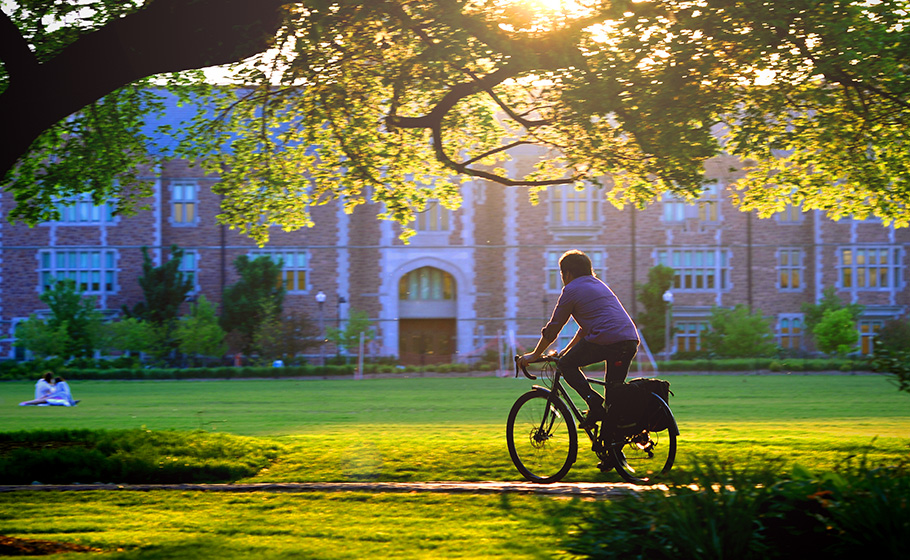

In [269]:
try_image = test_images[1]
Image.open(try_image)

In [270]:
print ('Normal Max search:', predict_captions(try_image)) 
print ('Beam Search, k=3:', beam_search_predictions(try_image, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(try_image, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(try_image, beam_index=7))

Normal Max search: A man prepares to throw a pail ! equipment .
Beam Search, k=3: A man prepares to throw a pail ! equipment .
Beam Search, k=5: A man prepares to throw a pail ! equipment .
Beam Search, k=7: A man prepares to throw a Frisbee .
